In [2]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

### Linear Regression

1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

In [3]:
data_x,data_y = np.loadtxt('linear.txt')

2) Plot `data_x` vs `data_y`

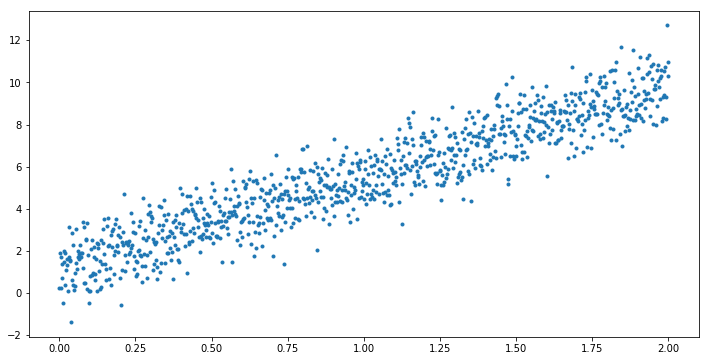

In [4]:
plt.figure(figsize=(12,6))
plt.plot(data_x,data_y,'.')

3) What what is the equation for a striaght line?

y = mx+c

4) What is the difference between a "good line" and a "bad line"?

5) What are we trying to adjust to minimize the $\chi^2$?

6) How do we findind the minimum of $\chi^2$? Whare are they?

7) Find the best slope and the best intercept.

In [5]:
def forward(A,B):
    newA = A.copy()
    newB = B.copy()
    nrow, ncol = A.shape
    for piv_row in range(ncol):
        for elim_row in range(piv_row+1,nrow):
            c = newA[elim_row,piv_row] / newA[piv_row,piv_row]
            newA[elim_row,:] = newA[elim_row,:] - c*newA[piv_row,:]
            newB[elim_row] = newB[elim_row] - c*newB[piv_row]
    return(newA,newB)

def backward(A,B):
    newA = A.copy()
    newB = B.copy()
    nrow, ncol = A.shape
    for piv_row in range(ncol-1,-1,-1):
        for elim_row in range(piv_row-1,-1,-1):
            c = newA[elim_row,piv_row] / newA[piv_row,piv_row]
            newA[elim_row,:] = newA[elim_row,:] - c*newA[piv_row,:]
            newB[elim_row] = newB[elim_row] - c*newB[piv_row]
    for i in range(nrow):
        newB[i] /= newA[i,i]
        newA[i,i] = 1
    return (newA,newB)
        
def guassianElim(A,B):
    nA,nB = forward(A,B)
    return backward(nA,nB)[1]

In [6]:
def sumSquare(xs):
    return sum(np.square(xs))

def sumCube(xs):
    return sum(np.power(xs,[3]*len(xs)))

def sumXY(xs,ys):
    return sum(np.multiply(xs,ys))

xsq = sumSquare(data_x)
xs = sum(data_x)
yxs = sumXY(data_x,data_y)
ys = sum(data_y)
n = len(data_x)

A = np.array([
    [xsq,xs],
    [xs,n],
])

B = np.array([yxs,ys])

a,b = guassianElim(A,B)

def line(a,b,x):
    return a*x + b

print(a,b)

4.3080543746 1.19580915962


8) Plot the line along with the data point to verify that you actually got the right answer.

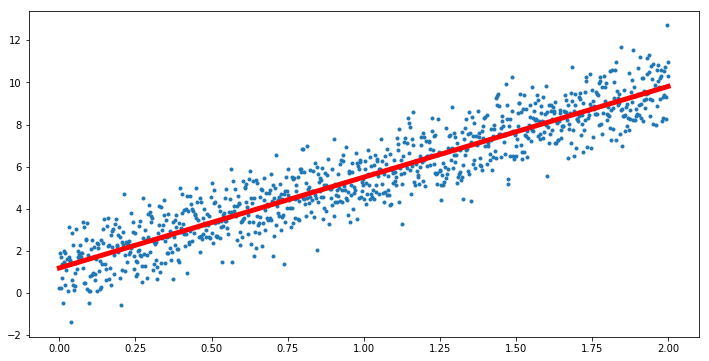

In [7]:
fx = [line(a,b,x) for x in data_x]
plt.figure(figsize=(12,6))
plt.plot(data_x,data_y,'.')
plt.plot(data_x,fx,lw=5,c='r')

9) What is your prediction for the value of `y` when `x`=3.0?

In [67]:
line(a,b,3.)

14.119972283434594

## Generalisation

The technique we learn above of finding the parameter that minimize the $\chi^2$ does not limit you to just a straight line model. Let us use it for a more general problem.

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

In [68]:
p_x,p_y = np.loadtxt('parabola.txt')

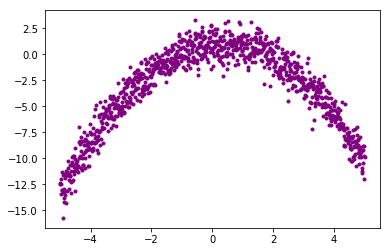

In [69]:
plt.plot(p_x,p_y,'.',c='purple')

2) What is the general form for parabola?

$ax^2 + bx + c$

3) What is the difference between a "good line" and a "bad line"?

4) What are we trying to minimize in order to find the best parabola?

5) Find the best fitted parabola and plot to verify.

In [70]:
def sumFourth(xs):
    return sum(np.power(xs,[4]*len(xs)))

def sumXsqY(xs,ys):
    xs = np.square(xs)
    return sum(np.multiply(xs,ys))

def sumSquare(xs):
    return sum(np.square(xs))

def sumCube(xs):
    return sum(np.power(xs,[3]*len(xs)))

def sumXY(xs,ys):
    return sum(np.multiply(xs,ys))

xf = sumFourth(p_x)
xc = sumCube(p_x)
xsqy = sumXsqY(p_x,p_y)
xsq = sumSquare(p_x)
xs = sum(p_x)
yxs = sumXY(p_x,p_y)
ys = sum(p_y)
n = len(p_x)

A = np.array([
    [xf,xc,xsq],
    [xc,xsq,xs],
    [xsq,xs,n],
])

B = np.array([xsqy,yxs,ys])

a,b,c = guassianElim(A,B)

def parabola(a,b,c,x):
    return a*x**2 + b*x + c

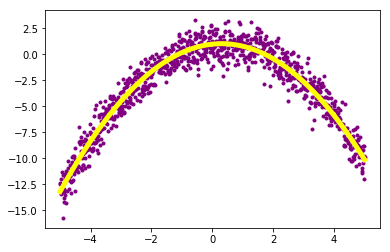

In [71]:
fx = [parabola(a,b,c,x) for x in p_x]
plt.plot(p_x,p_y,'.',c='purple')
plt.plot(p_x,fx,c='yellow',lw=5)

In [72]:
# Inefficient!!!

def s(nx,ny):
    return np.sum(p_x**nx * p_y**ny)

A = np.array([
    [s(4,0),s(3,0),s(2,0)],
    [s(3,0),s(2,0),s(1,0)],
    [s(2,0),s(1,0),s(0,0)],
])

B = np.array([s(2,1),s(1,1),s(0,1)])

### Extra

Find something interesting from http://www.stat.ufl.edu/~winner/datasets.html and make some prediction.

In [2]:
(6.67408e-11)*(5.972e24)/(6371**2)

9819649.737724954